In [2]:
pip install numpy-stl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from mpl_toolkits import mplot3d
from matplotlib import pyplot
import math
import numpy
from PIL import Image
import numpy as np
from stl import mesh

In [7]:
from PIL import Image
 
# creating a image object
im = Image.open("29_uw_IR.png")
px = im.load()
w = im.width
h = im.height
print(px[0,0])

62


In [8]:
# load the PNG image
image = Image.open('29_uw_IR.png')

# get the pixel data as a 1D array of RGBA values
pixels = list(image.getdata())
len(pixels)
print(pixels[0])

62


In [10]:
#print(width, height)
for i in range(w):
  for j in range(int(h/2)):
    px[i, j] = 0
im = im.save("black.jpg")

In [17]:
from PIL import Image, ImageFilter


# Opening the image (R prefixed to string
# in order to deal with '\' in paths)
image = Image.open(r"29_uw_IR.png")

# Converting the image to grayscale, as edge detection
# requires input image to be of mode = Grayscale (L)

# Detecting Edges on the Image using the argument ImageFilter.FIND_EDGES
image = image.filter(ImageFilter.FIND_EDGES)

# Saving the Image Under the name Edge_Sample.png
image.save(r"Edge_Sample.png")


True

<Figure size 432x288 with 0 Axes>

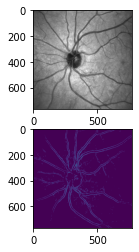

In [48]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt


# defining the canny detector function

# here weak_th and strong_th are thresholds for
# double thresholding step
def Canny_detector(img, weak_th = None, strong_th = None):
	
	# conversion of image to grayscale
	img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
	
	# Noise reduction step
	img = cv2.GaussianBlur(img, (21, 21), 1.5)
	cv2.imwrite("blur.png",img)
	# Calculating the gradients
	gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3)
	gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3)
	
	# Conversion of Cartesian coordinates to polar
	mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees = True)
	
	# setting the minimum and maximum thresholds
	# for double thresholding
	mag_max = np.max(mag)
	if not weak_th:weak_th = mag_max * 0.225
	if not strong_th:strong_th = mag_max * 0.215
	
	# getting the dimensions of the input image
	height, width = img.shape
	
	# Looping through every pixel of the grayscale
	# image
	for i_x in range(width):
		for i_y in range(height):
			
			grad_ang = ang[i_y, i_x]
			grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang)
			
			# selecting the neighbours of the target pixel
			# according to the gradient direction
			# In the x axis direction
			if grad_ang<= 22.5:
				neighb_1_x, neighb_1_y = i_x-1, i_y
				neighb_2_x, neighb_2_y = i_x + 1, i_y
			
			# top right (diagonal-1) direction
			elif grad_ang>22.5 and grad_ang<=(22.5 + 45):
				neighb_1_x, neighb_1_y = i_x-1, i_y-1
				neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
			
			# In y-axis direction
			elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90):
				neighb_1_x, neighb_1_y = i_x, i_y-1
				neighb_2_x, neighb_2_y = i_x, i_y + 1
			
			# top left (diagonal-2) direction
			elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135):
				neighb_1_x, neighb_1_y = i_x-1, i_y + 1
				neighb_2_x, neighb_2_y = i_x + 1, i_y-1
			
			# Now it restarts the cycle
			elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180):
				neighb_1_x, neighb_1_y = i_x-1, i_y
				neighb_2_x, neighb_2_y = i_x + 1, i_y
			
			# Non-maximum suppression step
			if width>neighb_1_x>= 0 and height>neighb_1_y>= 0:
				if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]:
					mag[i_y, i_x]= 0
					continue

			if width>neighb_2_x>= 0 and height>neighb_2_y>= 0:
				if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]:
					mag[i_y, i_x]= 0

	weak_ids = np.zeros_like(img)
	strong_ids = np.zeros_like(img)			
	ids = np.zeros_like(img)
	
	# double thresholding step
	for i_x in range(width):
		for i_y in range(height):
			
			grad_mag = mag[i_y, i_x]
			
			if grad_mag<weak_th:
				mag[i_y, i_x]= 0
			elif strong_th>grad_mag>= weak_th:
				ids[i_y, i_x]= 1
			else:
				ids[i_y, i_x]= 2
	
	
	# finally returning the magnitude of
	# gradients of edges
	return mag

frame = cv2.imread('29_uw_IR.png')

# calling the designed function for
# finding edges
canny_img = Canny_detector(frame)

# Displaying the input and output image
plt.figure()
f, plots = plt.subplots(2, 1)
plots[0].imshow(frame)
plots[1].imshow(canny_img)
cv2.imwrite("can.png",canny_img)

Inspiration for Edge Detection Code: https://www.geeksforgeeks.org/implement-canny-edge-detector-in-python-using-opencv/?ref=lbp

In [11]:




# dimensions of the image
#w, h = image.size

# create a list of 3D vectors for each pixel
pixel_vectors = []
for y in range(h):
    for x in range(w):
        index = y * w + x
        #print(pixels[index])
        z  = pixels[index]/255
        # map RGB values to the range [0, 1]
        pixel_vectors.append(np.array([x, y, z]))

# create a mesh from the list of vectors
vertices = np.vstack(pixel_vectors)
faces = mesh.Mesh(np.zeros(len(pixel_vectors), dtype=mesh.Mesh.dtype))
for i in range(len(pixel_vectors)):
    faces.vectors[i] = [i, i, i]
m = mesh.Mesh(np.zeros(len(pixel_vectors), dtype=mesh.Mesh.dtype))
m.vectors = faces.vectors.copy()
m.vertices = vertices.copy()

# save the mesh as an STL file
m.save('output.stl')